See also:

- https://juliareach.github.io/ReachabilityAnalysis.jl/dev/models/VanDerPol/#Safety-verification-1

In [1]:
using TaylorSeries, OrdinaryDiffEq, TaylorIntegration

function vanderpol!(du,u,ps,t)
    du[1] = u[2]
    du[2] = ps[1]*(1-u[1]^2)*u[2]-u[1]
    nothing
end

tspan = (0.0, 7.0)
u0 = [1.4, 2.4]
ps = [1.0]
prob = ODEProblem(vanderpol!, u0, tspan, ps)

sol_Tsit5 = solve(prob, Tsit5()) # success
sol_TM20 = solve(prob, TaylorMethod(20)); #success

# TaylorSeries Expansion
ξ = set_variables("ξ", numvars=2, order=20)# \xi
u0ξ = u0 .+ ξ

#prob2 = ODEProblem(vanderpol!, u0ξ, tspan, ps)
#solve(prob2, Tsit5()) #LoadError: MethodError: no method matching TaylorN{Float64}(::Rational{Int64})

u0ξ

2-element Array{TaylorN{Float64},1}:
  1.4 + 1.0 ξ₁ + 𝒪(‖x‖²¹)
  2.4 + 1.0 ξ₂ + 𝒪(‖x‖²¹)

In [2]:
using ReachabilityAnalysis
const RA = ReachabilityAnalysis

ReachabilityAnalysis

In [3]:
@taylorize function _vanderpol!(du, u, params, t)
    local μ = 1.0
    du[1] = u[2]
    du[2] = (μ * u[2]) * (1 - u[1]^2) - u[1]
    nothing
end

In [4]:
X0 = Singleton(u0)
prob = @ivp(x' = _vanderpol!(x), dim=2, x(0) ∈ X0)
sol_reach = RA.solve(prob, T=7.0, alg=TMJets());

In [5]:
RA.tspan(sol_reach)

[0, 7]

In [6]:
R1 = sol_reach[1]

TaylorModelReachSet{Float64}(TaylorModels.TaylorModel1{TaylorN{Float64},Float64}[  1.4 + ( 2.4) t + ( - 1.8519999999999996) t² + ( - 2.4953600000000002) t³ + ( 2.7125797333333326) t⁴ + ( 4.1308474112) t⁵ + ( - 4.92251668090311) t⁶ + ( - 7.723309612151955) t⁷ + ( 9.43814823853997) t⁸ + [-2.03494e-15, 8.17498e-15],   2.4 + ( - 3.7039999999999993) t + ( - 7.486080000000001) t² + ( 10.85031893333333) t³ + ( 20.654237056000003) t⁴ + ( - 29.53510008541866) t⁵ + ( - 54.06316728506369) t⁶ + ( 75.50518590831976) t⁷ + ( 136.63417390888216) t⁸ + [-1.01101e-13, 2.62936e-15]], [0, 0.0200977])

In [7]:
RA.tspan(R1)

[0, 0.0200977]

In [8]:
polynomial(R1)[1]

  1.4 + 𝒪(‖x‖³) + ( 2.4 + 𝒪(‖x‖³)) t + ( - 1.8519999999999996 + 𝒪(‖x‖³)) t² + ( - 2.4953600000000002 + 𝒪(‖x‖³)) t³ + ( 2.7125797333333326 + 𝒪(‖x‖³)) t⁴ + ( 4.1308474112 + 𝒪(‖x‖³)) t⁵ + ( - 4.92251668090311 + 𝒪(‖x‖³)) t⁶ + ( - 7.723309612151955 + 𝒪(‖x‖³)) t⁷ + ( 9.43814823853997 + 𝒪(‖x‖³)) t⁸ + 𝒪(t⁹)

In [9]:
polynomial(R1)[2]

  2.4 + 𝒪(‖x‖³) + ( - 3.7039999999999993 + 𝒪(‖x‖³)) t + ( - 7.486080000000001 + 𝒪(‖x‖³)) t² + ( 10.85031893333333 + 𝒪(‖x‖³)) t³ + ( 20.654237056000003 + 𝒪(‖x‖³)) t⁴ + ( - 29.53510008541866 + 𝒪(‖x‖³)) t⁵ + ( - 54.06316728506369 + 𝒪(‖x‖³)) t⁶ + ( 75.50518590831976 + 𝒪(‖x‖³)) t⁷ + ( 136.63417390888216 + 𝒪(‖x‖³)) t⁸ + 𝒪(t⁹)

In [10]:
R2 = sol_reach[10]
polynomial(R2)[2]

  1.576769151568127 + 𝒪(‖x‖³) + ( - 5.056967551359136 + 𝒪(‖x‖³)) t + ( 0.12940591285197756 + 𝒪(‖x‖³)) t² + ( 13.466785998287321 + 𝒪(‖x‖³)) t³ + ( - 12.248580318716886 + 𝒪(‖x‖³)) t⁴ + ( - 24.021877591508293 + 𝒪(‖x‖³)) t⁵ + ( 49.66402080286042 + 𝒪(‖x‖³)) t⁶ + ( 18.293297014330133 + 𝒪(‖x‖³)) t⁷ + ( - 131.72991923602365 + 𝒪(‖x‖³)) t⁸ + 𝒪(t⁹)

In [11]:
RA.tspan(R2)

[0.178431, 0.203042]

---

In [12]:
using Plots

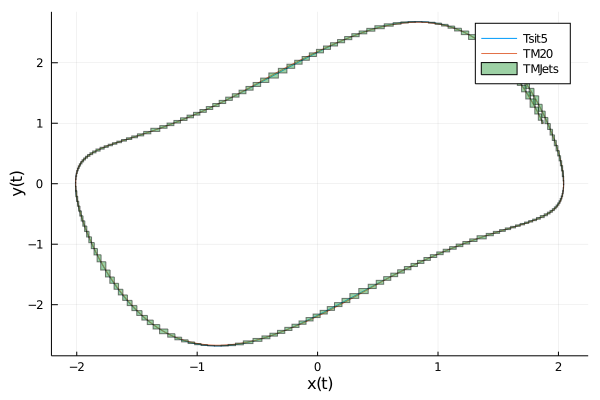

In [13]:
fig = plot(xlab="x(t)", ylab="y(t)")
plot!(fig, sol_Tsit5, vars=(1, 2), lab="Tsit5")
plot!(fig, sol_TM20, vars=(1, 2), lab="TM20")
plot!(fig, sol_reach, vars=(1, 2), lab="TMJets")

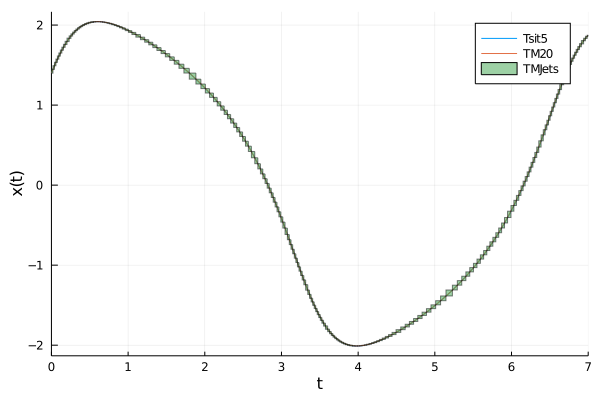

In [14]:
fig = plot(xlab="t", ylab="x(t)")
plot!(fig, sol_Tsit5, vars=(0, 1), lab="Tsit5")
plot!(fig, sol_TM20, vars=(0, 1), lab="TM20")
plot!(fig, sol_reach, vars=(0, 1), lab="TMJets")